In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pickle

In [8]:
data=pd.read_csv("raw_data1.csv")

In [9]:
data.head(10)

Patient Number State Patient Number Date Announced  Estimated Onset Date  \
0               1             KL-TS-P1     30/01/2020                   NaN   
1               2             KL-AL-P1     02/02/2020                   NaN   
2               3             KL-KS-P1     03/02/2020                   NaN   
3               4                DL-P1     02/03/2020                   NaN   
4               5                TS-P1     02/03/2020                   NaN   
5               6                  NaN     03/03/2020                   NaN   
6               7                  NaN     04/03/2020                   NaN   
7               8                  NaN     04/03/2020                   NaN   
8               9                  NaN     04/03/2020                   NaN   
9              10                  NaN     04/03/2020                   NaN   

  Age Bracket Gender             Detected City Detected District  \
0          20      F                  Thrissur          Thrissur   
1         NaN    NaN                 Alappuzha         Alappuzha   
2         NaN    NaN                 Kasaragod         Kasaragod   
3          45      M  East Delhi (Mayur Vihar)        East Delhi   
4          24      M                 Hyderabad         Hyderabad   
5          69      M                    Jaipur          Italians   
6          55    NaN                  Gurugram          Italians   
7          55    NaN                  Gurugram          Italians   
8          55    NaN                  Gurugram          Italians   
9          55    NaN                  Gurugram          Italians   

  Detected State State code Current Status  \
0         Kerala         KL      Recovered   
1         Kerala         KL      Recovered   
2         Kerala         KL      Recovered   
3          Delhi         DL      Recovered   
4      Telangana         TG      Recovered   
5      Rajasthan         RJ      Recovered   
6        Haryana         HR      Recovered   
7        Haryana         HR      Recovered   
8        Haryana         HR      Recovered   
9        Haryana         HR      Recovered   

                                               Notes  \
0                               Travelled from Wuhan   
1                               Travelled from Wuhan   
2                               Travelled from Wuhan   
3                      Travelled from Austria, Italy   
4  Travelled from Dubai to Bangalore on 20th Feb,...   
5                               Travelled from Italy   
6                               Travelled from Italy   
7                               Travelled from Italy   
8                               Travelled from Italy   
9                               Travelled from Italy   

  Contracted from which Patient (Suspected) Nationality Type of transmission  \
0                                       NaN       India             Imported   
1                                       NaN       India             Imported   
2                                       NaN       India             Imported   
3                                       NaN       India             Imported   
4                                       NaN       India             Imported   
5                                       NaN       Italy             Imported   
6                                        P6       Italy             Imported   
7                                        P6       Italy             Imported   
8                                        P6       Italy             Imported   
9                                        P6       Italy             Imported   

  Status Change Date                                           Source_1  \
0         14/02/2020  https://twitter.com/vijayanpinarayi/status/122...   
1         14/02/2020  https://www.indiatoday.in/india/story/kerala-r...   
2         14/02/2020  https://www.indiatoday.in/india/story/kerala-n...   
3         15/03/2020  https://www.indiatoday.in/india/story/not-a-ja...   
4   

In [60]:
data.shape

(17306, 20)

# Part A

In [72]:
def getSite(link):
    l=link.split("/")
    print(l)
    if len(l)>3:
        return l[2]
    return ""

In [94]:
getSite("https://www.mohfw.gov.in/")

['https:', '', 'www.mohfw.gov.in', '']


'www.mohfw.gov.in'

In [74]:
sources={}
nan=0
for ind,row in data.iterrows():
    print(type(row['Source_1']),type(row['Source_2']),type(row['Source_3']))
    if isinstance(row['Source_1'],str):
        s1=getSite(row['Source_1'])
        if s1!="":
            if s1 in sources.keys():
                sources[s1]+=1
            else:
                sources[s1]=1
    else:
        nan+=1
    if isinstance(row['Source_2'],str):
        s2=getSite(row['Source_2'])
        if s2!="":
            if s2 in sources.keys():
                sources[s2]+=1
            else:
                sources[s2]=1
    else:
        nan+=1
    if isinstance(row['Source_3'],str):
        s3=getSite(row['Source_3'])
        if s3!="":
            if s3 in sources.keys():
                sources[s3]+=1
            else:
                sources[s3]=1
    else:
        nan+=1
    

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'vijayanpinarayi', 'status', '1222819465143832577']
['https:', '', 'weather.com', 'en-IN', 'india', 'news', 'news', '2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'www.indiatoday.in', 'india', 'story', 'kerala-reports-second-case-of-coronavirus-1642494-2020-02-02']
['https:', '', 'weather.com', 'en-IN', 'india', 'news', 'news', '2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'www.indiatoday.in', 'india', 'story', 'kerala-now-confirms-third-case-of-coronavirus-1642789-2020-02-03']
['https:', '', 'twitter.com', 'ANI', 'status', '1224221485805395968?s=20']
['https:', '', 'weather.com', 'en-IN', 'india', 'news', 'news', '2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully']
<class 'str'> <class 'str'

['https:', '', 'timesofindia.indiatimes.com', 'city', 'delhi', 'at-six-delhi-reports-most-covid-19-cases-in-a-day', 'articleshow', '74739489.cms']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'www.mohfw.gov.in', '']
['https:', '', 'timesofindia.indiatimes.com', 'city', 'delhi', 'at-six-delhi-reports-most-covid-19-cases-in-a-day', 'articleshow', '74739489.cms']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'www.mohfw.gov.in', '']
['https:', '', 'timesofindia.indiatimes.com', 'city', 'delhi', 'at-six-delhi-reports-most-covid-19-cases-in-a-day', 'articleshow', '74739489.cms']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'pressnote20.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'pressnote20.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'pressnote20.pdf']
<class 'str'> <class 'str'> <class 'float'>
[

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'www.mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'www.mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'www.mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1241230416893210624']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1241234299862409216']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'm.hindustantimes.com', 'cities', 'four-more-test-positive-for-covid-19-in-chandigarh-panchkula-and-mohali-taking-count-to-10-in-tricity', 'story-2KPatugr8JiGcNIUXZAJhI_amp.html?__twitter_impression=true']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1241261548665860097']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1241261548665860097']
<class 'str

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1242069720276168705']
['https:', '', 'www.facebook.com', 'CollectorKNR', 'posts', '2833958063367696']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1242069720276168705']
['https:', '', 'www.facebook.com', 'CollectorKNR', 'posts', '2833958063367696']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1242069720276168705']
['https:', '', 'www.facebook.com', 'dcekm', 'posts', '965794730485017']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1242069720276168705']
['https:', '', 'www.facebook.com', 'dcekm', 'posts', '965794730485017']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1242069720276168705']
['https:', '', 'www.manoramaonline.com', 'district-news', 'thrissur', '2020', '03', '27', 'thrissur-two-more-people-found-posi

<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'www.deccanherald.com', 'state', 'mangaluru', '34-year-old-man-tests-positive-for-covid-19-in-udupi-817473.html']
['https:', '', 'www.thehindu.com', 'news', 'national', 'karnataka', 'coronavirus-udupi-records-first-positive-case', 'article31161050.ece']
['State Health Bulletin']
<class 'str'> <class 'str'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'Bulletin%20of%20Haryana%20as%20on%2025%20March1.pdf']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1242797792604475392']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'timesofindia.indiatimes.com', 'city', 'bhopal', 'madhya-pradesh-coronavirus-count-touches-9-curfew-in-gwalior', 'articleshow', '74802791.cms']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1242775064287698944']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twit

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1243201529005268994']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1243198105148768263']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1243203975442075650']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1243197465492250624']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1243206861140049920', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1243215021582077953']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1243215021582077953']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1243215021582077953']
<class 'str'> <class 'str'> <class 'float'>
['ht

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1243598931407319041?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1243598931407319041?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1243523448896290817?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1243523448896290817?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1243523448896290817?s=20']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1243739826622365696?s=20']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1243748304157995008?s=20']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1243739826622365696?s=20']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1243

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244190714776322048?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244190714776322048?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244190714776322048?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244190714776322048?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244212572712103936?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244212572712103936?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244212572712103936?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244239582415032322'

['https:', '', 'twitter.com', 'PTI_News', 'status', '1244470793909620742?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244470793909620742?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244470793909620742?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244470793909620742?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244500743505113089?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244500743505113089?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244500743505113089?s=20']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244500743505113089?s=20']
<class 'str'> <class 'str'> <class 'st

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1244628940175495169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1244628940175495169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1244628940175495169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1244628940175495169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1244628940175495169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244627469199486977']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244627469199486977']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1244627469199486977']
<class 's

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1244865476355690496']
<class 'str'> <class 'float'> <c

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244971681182973953']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244970503082774528']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159189282217575&id=100507158085788']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244970503082774528']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159189282217575&id=100507158085788']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244970503082774528']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244970503082774528']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1244970503082774528']
['https:', '', 'www.manoramaonline.com', 'district-news', 'kollam', '2020', '04', '01', 'kollam-covid-in-district-

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244998252803452928']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status',

['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1245332364563185664']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'NHM_TN', 'status'

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'karunadu.karnataka.gov.in', 'hfw', 'kannada', 'nCovDocs', '01-04-2020(English).pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245346024417366016']
<class 'str'> <class 'float'> <class 'flo

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1245425932929617921']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status',

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1245667080038318081']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1245667080038318081']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1245667080038318081']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1245667080038318081']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1245667080038318081']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.rajswasthya.nic.in', '']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.rajswasthya.nic.in', '']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'Bulletin,%20Evening02042020.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245693514500804609']
['https:', '', 'twitter.com', 'ANI', 'status', '1245694253197488128']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245693514500804609']
['https:', '', 'twitter.com', 'ANI', 'status', '1245694253197488128']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245693514500804609']
['https:', '', 'twitter.com', 'ANI', 'status', '1245694253197488128']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245693514500804609']
['https:', '', 'twitter.com', 'ANI', 'status', '1245694253197488128']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245693514500804609']
['https:', '', 'twitter.com', 'ANI', 'status', '1245694253197488128']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI',

['https:', '', 'www.outlookindia.com', 'newsscroll', 'bengal-death-toll-rises-to-seven-cases-go-past-50', '1788941']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ians_india', 'status', '1245687791591149568']
['https:', '', 'www.outlookindia.com', 'newsscroll', 'bengal-death-toll-rises-to-seven-cases-go-past-50', '1788941']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ians_india', 'status', '1245687791591149568']
['https:', '', 'www.outlookindia.com', 'newsscroll', 'bengal-death-toll-rises-to-seven-cases-go-past-50', '1788941']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ians_india', 'status', '1245687791591149568']
['https:', '', 'www.outlookindia.com', 'newsscroll', 'bengal-death-toll-rises-to-seven-cases-go-past-50', '1788941']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ians_india', 'status', '1245687791591149568']
['https:', '', 'www.outlookindia.com', 'newsscro

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245909537384804354']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245909537384804354']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245909537384804354']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245933428551254016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245933428551254016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245933428551254016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245933428551254016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1245933428551254016']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI',

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246043856447176704']
['https:', '', 'twitter.com', 'ANI', 'status', '1246054906298941440']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI',

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status', '1246084405602316292']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'Eatala_Rajender', 'status',

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246137047678701568']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246137047678701568']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1246097072761081856']
['https:', '', 'experience.arcgis.com', 'experience', '8167a61f882a4af4b9098e947dfd589f', '']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1246097072761081856']
['https:', '', 'experience.arcgis.com', 'experience', '8167a61f882a4af4b9098e947dfd589f', '']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1246097072761081856']
['https:', '', 'experience.arcgis.com', 'experience', '8167a61f882a4af4b9098e947dfd589f', '']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'himantabiswa', 'status', '1246147959823028224']
<cla

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1246407041972760577']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1246407041972760577']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1246407041972760577']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1246407041972760577']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1246407041972760577']
<class 'float'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1246409749911891968']
['https:', '', 'twitter.com', 'AamAadmiParty', 'status', '1246408741357944833']
<class 'float'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1246409749911891968']
['https:', '', 'twitter.com', 'AamAadmiParty', 'status', 

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246412467447554049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246412467447554049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246412467447554049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246412467447554049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1246469032619823107', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1246469032619823107', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1246469032619823107', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1246469032619823107', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1246469032619823107', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1246469032619823107', 'photo', '2']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1246477230068228098', 'photo', '1']
<class 'str'> <class 'float

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1246674213324255232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1246674213324255232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1246674213324255232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1246674213324255232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1246674213324255232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', '']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', '']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', '']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', '']

<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'> <class 'float'>
['State Bulletin: 05 Apr Evening']
<class 'str'> <class 'float'

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246793618855096320']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246797969447219201']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246797969447219201']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246797969447219201']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246797969447219201']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246797969447219201']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246789359791112195']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246789359791112195']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1246789359791112195']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247010484211060739']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247015579703054341']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247034856329990145']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247034856329990145']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247034856329990145']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247034856329990145']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247034856329990145']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247034856329990145']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1247144702526337026']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

['https:', '', 'twitter.com', 'PTI_News', 'status', '1247164710417383431']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'covidmpressnote06.pdf']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1247164710417383431']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'covidmpressnote06.pdf']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1247164710417383431']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'covidmpressnote06.pdf']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1247164710417383431']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'covidmpressnote06.pdf']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1247164710417383431']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'covidmpressnote06.pdf']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.c

['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1247385581190971394']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'dronamaps.com', 'corona.html#', '']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1247461987811905537']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1247417593968742400']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'dronamaps.com', 'corona.html#', '']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'dronamaps.com', 'corona.html#', '']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1247376032878882816']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'dronamaps.com', 'corona.html#', '']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1247559376933535748']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'dronamaps.com', 'corona.html#', '']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1247559376933535748']
<class 'str'> <class 'str'> <class 'float'>
['

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1247551896413331457']


['Press Bulletin']
<class 'str'> <class 'float'> <class 'float'>
['Press Bulletin']
<class 'str'> <class 'float'> <class 'float'>
['Press Bulletin']
<class 'str'> <class 'float'> <class 'float'>
['Press Bulletin']
<class 'str'> <class 'float'> <class 'float'>
['Press Bulletin']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247554866043473920', 'photo', '3']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247554866043473920', 'photo', '3']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247554866043473920', 'photo', '3']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247554866043473920', 'photo', '3']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247554866043473920', 'photo', '3']
<class 'str'> <class 'floa

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1824']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1247825810410450944']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1824']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1247825810410450944']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1824']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1247825810410450944']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1824']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1247825810410450944']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1824']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1247825810410450944']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1824']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1247825810410450944']
<class 'st

['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pd

['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1247907281703862272']
<class 'str'> <class 'float'> <class 'float'>


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248096119348850689']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248084830476173313']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248084830476173313']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248097618594533378']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248097618594533378']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248097618594533378']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248097618594533378']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248097618594533378']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twit

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1248126814301483009']
<class 'str'> <class 'float'> <c

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1248234038336172032']
['https:', '', 'www.facebook.com', 'CollectorKNR', 'posts', '2872486612848174']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1248234038336172032']
['https:', '', 'www.facebook.com', 'CollectorKNR', 'posts', '2872486612848174']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1248234038336172032']
['https:', '', 'www.facebook.com', 'CollectorKNR', 'posts', '2872486612848174']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1248234038336172032']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=161827818620388&id=100507158085788']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1248234038336172032']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=16182781862

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248248436643647489']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1928']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248277713103667200']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1928']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248277713103667200']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1928']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248277713103667200']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1928']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248277713103667200']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1928']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248277713103667200']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '1928']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1248277713103667200']
<class 'st

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1248560775678943232']
<class 'str'> <class 'fl

['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1248611777526394885']
<class 'str'> <class 'float'> <class 'float'>


['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'C

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1248641729013547008']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248853360901378049']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248959427169767424']
['https:', '', 't.me', 'COVID19_Kerala', '419']
['https:', '', 'www.manoramaonline.com', 'district-news', 'kannur', '2020', '04', '12', 'kannur-covid19-disease.html']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248959427169767424']
['https:', '', 't.me', 'COVID19_Kerala', '419']
['https:', '', 'www.manoramaonline.com', 'district-news', 'kannur', '2020', '04', '12', 'kannur-covid19-disease.html']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248959427169767424']
['https:', '', 't.me', 'COVID19_Kerala', '419']
['https:', '', 'www.manoramaonline.com', 'district-news', 'kannur', '2020', '04', '12', 'kannur-covid19-disease.html']
<class 'str'> <class 'float'> <class 'str'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248959427169767424']
['https:', '', 'www.manoramaonline.com', 'distric

['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248996095436308482']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'C

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'Karnataka_KoViD19_Broadcast', '1875']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'Karnataka_KoViD19_Broadcast', '1875']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249233926456999942']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249233926456999942']
<class 'str'> <class 'float'> <class 'float'>
['

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1204122020105602198.pdf']
<class 'str'> <class 'float'> <cla

['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249306312598405121']
<class 'str'> <class 'float'> <class '

['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1249322012058644480']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249334308076007426']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1249322012058644480']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249334308076007426']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1249322012058644480']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249334308076007426']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1249322012058644480']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249334308076007426']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1249322012058644480']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249334308076007426']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.c

['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1249370739972530177']
<class 'str'> <class 'float'> <class 'float'>


<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249666926499876866']
['https:', '', 'twitter.com', 'ANI', 'status', '1249668371970392065']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249666926499876866']
['https:', '', 'twitter.com', 'ANI', 'status', '1249668371970392065']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249666926499876866']
['https:', '', 'twitter.com', 'ANI', 'status', '1249668371970392065']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249666926499876866']
['https:', '', 'twitter.com', 'ANI', 'status', '1249668371970392065']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1249666926499876866']
['https:', '', 'twitter.com', 'ANI', 'status', '1249668371970392065']
<class 'str'> <class 'str'> <c

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
<class 'str'> <class 'str'> <class 'floa

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2199']

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <c

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
<class 'str'> <class 'float'> <c

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1249907649103171584']
<class 'str'> <class 'fl

['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1249946573791879169']
<class 'str'> <class 'float'> <class 'float'>


<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
<class 'str'> <class 'str'> <class 'float'>
['https:', 

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1250056254799499264']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1250056254799499264']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '125006912

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status', '1250102955744710661']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'TelanganaHealth', 'status',

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250078725397504002?s=09']
<class 'str'> <class 'float'> <c

['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250368951046922240']
<class 'str'> <class 'fl

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250436322763796492']
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1250440617420709894']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250436322763796492']
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1250440617420709894']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250436322763796492']
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1250440617420709894']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250436322763796492']
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1250440617420709894']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250436322763796492']
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1250440617420709894']
<class 'str'> <class 'str'> <class 

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250437983150325768']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020083126381.pdf']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250442361018011649']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020083126381.pdf']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250442361018011649']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020083126381.pdf']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250442361018011649']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020083126381.pdf']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250442361018011649']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020083126381.pdf']
['https:', '', 'twitter.com', 'PIBAhmedabad', 's

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
<class 'str'> <class 'float'> <cla

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1250678319399399425']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1250750283585445889']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '12507502835854

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1250780365322477570']
<class 'str'> <class 'fl

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2448']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2448']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2448']
<

<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250811102721486849']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813036895469568']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813598651174913']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250811102721486849']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813036895469568']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813598651174913']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250811102721486849']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813036895469568']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813598651174913']
<class 'str'> <class 'str'> <class 'str'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250811102721486849']
['https:', '', 'twitter.com', 'ANI', 'status', '1250813036895469568']
['https:', '', 'twitter.com', 'ANI', 'stat

['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['mohfw.gov.in']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
<class 'str'> <class 'float'> <class 'float'>
['ht

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1251047337637494784']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1251047337637494784']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1251047337637494784']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1251047337637494784']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1251047337637494784']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2017th%20april%20morning.pdf']
<class 'str'> <class 'float'> <class 'float'>
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2017th%20april%20morning.pdf']
<class 'str'> <class 'float'> <class 'float'>
[

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1704172020075526411.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1704172020075526411.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1704172020075526411.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1704172020075526411.pdf']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'gujcovid19.gujarat.gov.in', '

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'JansamparkMP', 'status', '1251155692213334018']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1251158088419176454']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251178667822256128']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'rajeshtope11', 'status', '1251194830962724865?s=19']
<class

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251504616476258305']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251492703436562432']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <c

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <c

['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'P

['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2587']
<class 'str'> <class 'float'> <class 'float'>

<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251530620154585088']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251507592817344512']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251530620154585088']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251507592817344512']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251530620154585088']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251507592817344512']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251530620154585088']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251507592817344512']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '1251530620154585088']
['https:', '', 'twitter.com', 'kbssidhu1961', 'status', '125150759281

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251545226604417030']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<c

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']


<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']


['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251880465012854785']
<c

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.co

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2679']

['https:', '', 't.me', 'indiacovid', '2680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251903167668850688']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251903167668850688']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251903167668850688']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251903167668850688']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251903167668850688']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251903167668850688']
<class 'str'> <class 'str'> <class 'float'>
['https:', '', 't.me', 'indiacovid', '2680']
[

<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1251930194690048002']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1251930194690048002']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1251930194690048002']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sanjayjavin', 'status', '1251938442067361792']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sanjayjavin', 'status', '1251938442067361792']
<class 'str'> <class 'float'> <class 'float'>
['https:', '', 'twitter.com', 'sanjayjavin', 'status', '1251938442067361792']


In [76]:
sources

{'twitter.com': 16523,
 'weather.com': 3,
 'www.indiatoday.in': 105,
 'economictimes.indiatimes.com': 40,
 'www.deccanherald.com': 25,
 'www.thehindu.com': 80,
 'indianexpress.com': 52,
 'www.businesstoday.in': 6,
 'timesofindia.indiatimes.com': 60,
 'health.delhigovt.nic.in': 4,
 'www.google.com': 5,
 'dhs.kerala.gov.in': 83,
 'www.hindustantimes.com': 32,
 'www.facebook.com': 219,
 'www.firstpost.com': 5,
 'punjabupdate.com': 17,
 'english.manoramaonline.com': 37,
 'www.newindianexpress.com': 17,
 'www.livemint.com': 36,
 'english.mathrubhumi.com': 11,
 'www.theweek.in': 4,
 'www.thenewsminute.com': 25,
 'www.ndtv.com': 14,
 'www.indiatvnews.com': 6,
 'mumbaimirror.indiatimes.com': 3,
 'www.businessinsider.in': 4,
 'www.mathrubhumi.com': 2,
 'newsonair.com': 1,
 'mobile.twitter.com': 15,
 'docs.google.com': 2,
 'drive.google.com': 1,
 'epaper.hindustantimes.com': 2,
 'thepigeonexpress.com': 1,
 'www.news18.com': 4,
 'm.hindustantimes.com': 5,
 'www.latestly.com': 1,
 'ahmedabadmirror

In [84]:
nan

31002

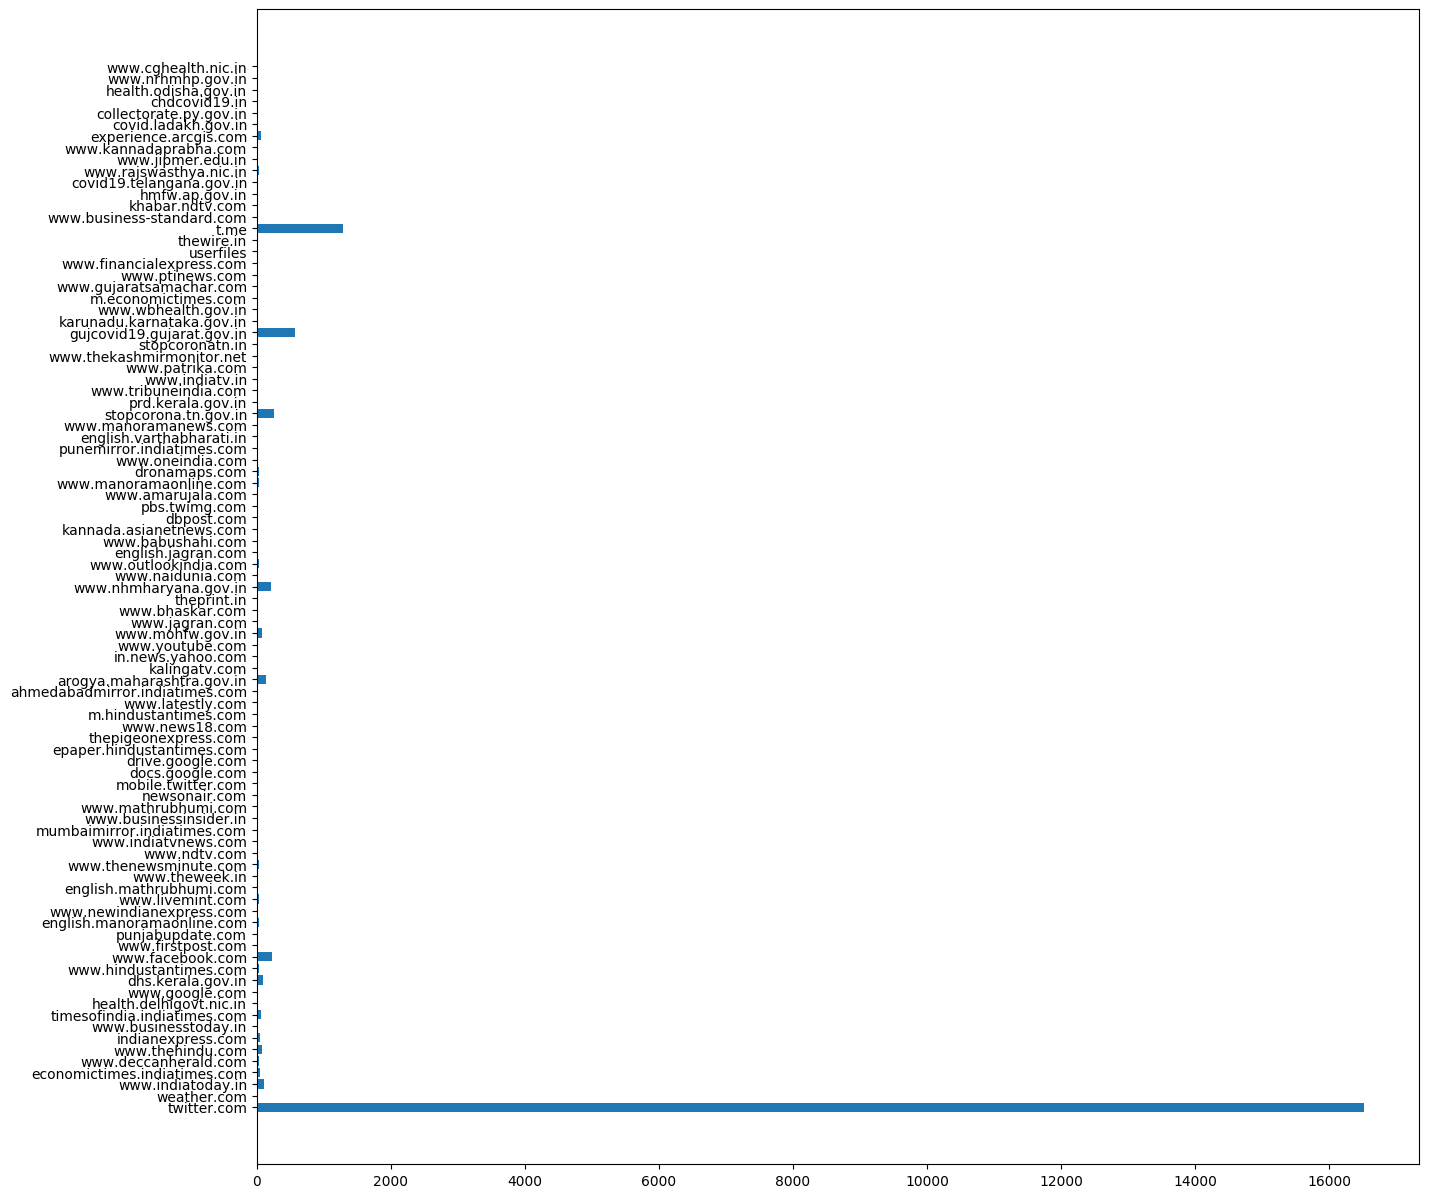

In [78]:
fig, ax = plt.subplots(figsize=(15,15))
source_list=sources.keys()
y_pos = np.arange(len(source_list))
ax.barh(y_pos,sources.values())
ax.set_yticks(y_pos)
ax.set_yticklabels(source_list)
plt.show()

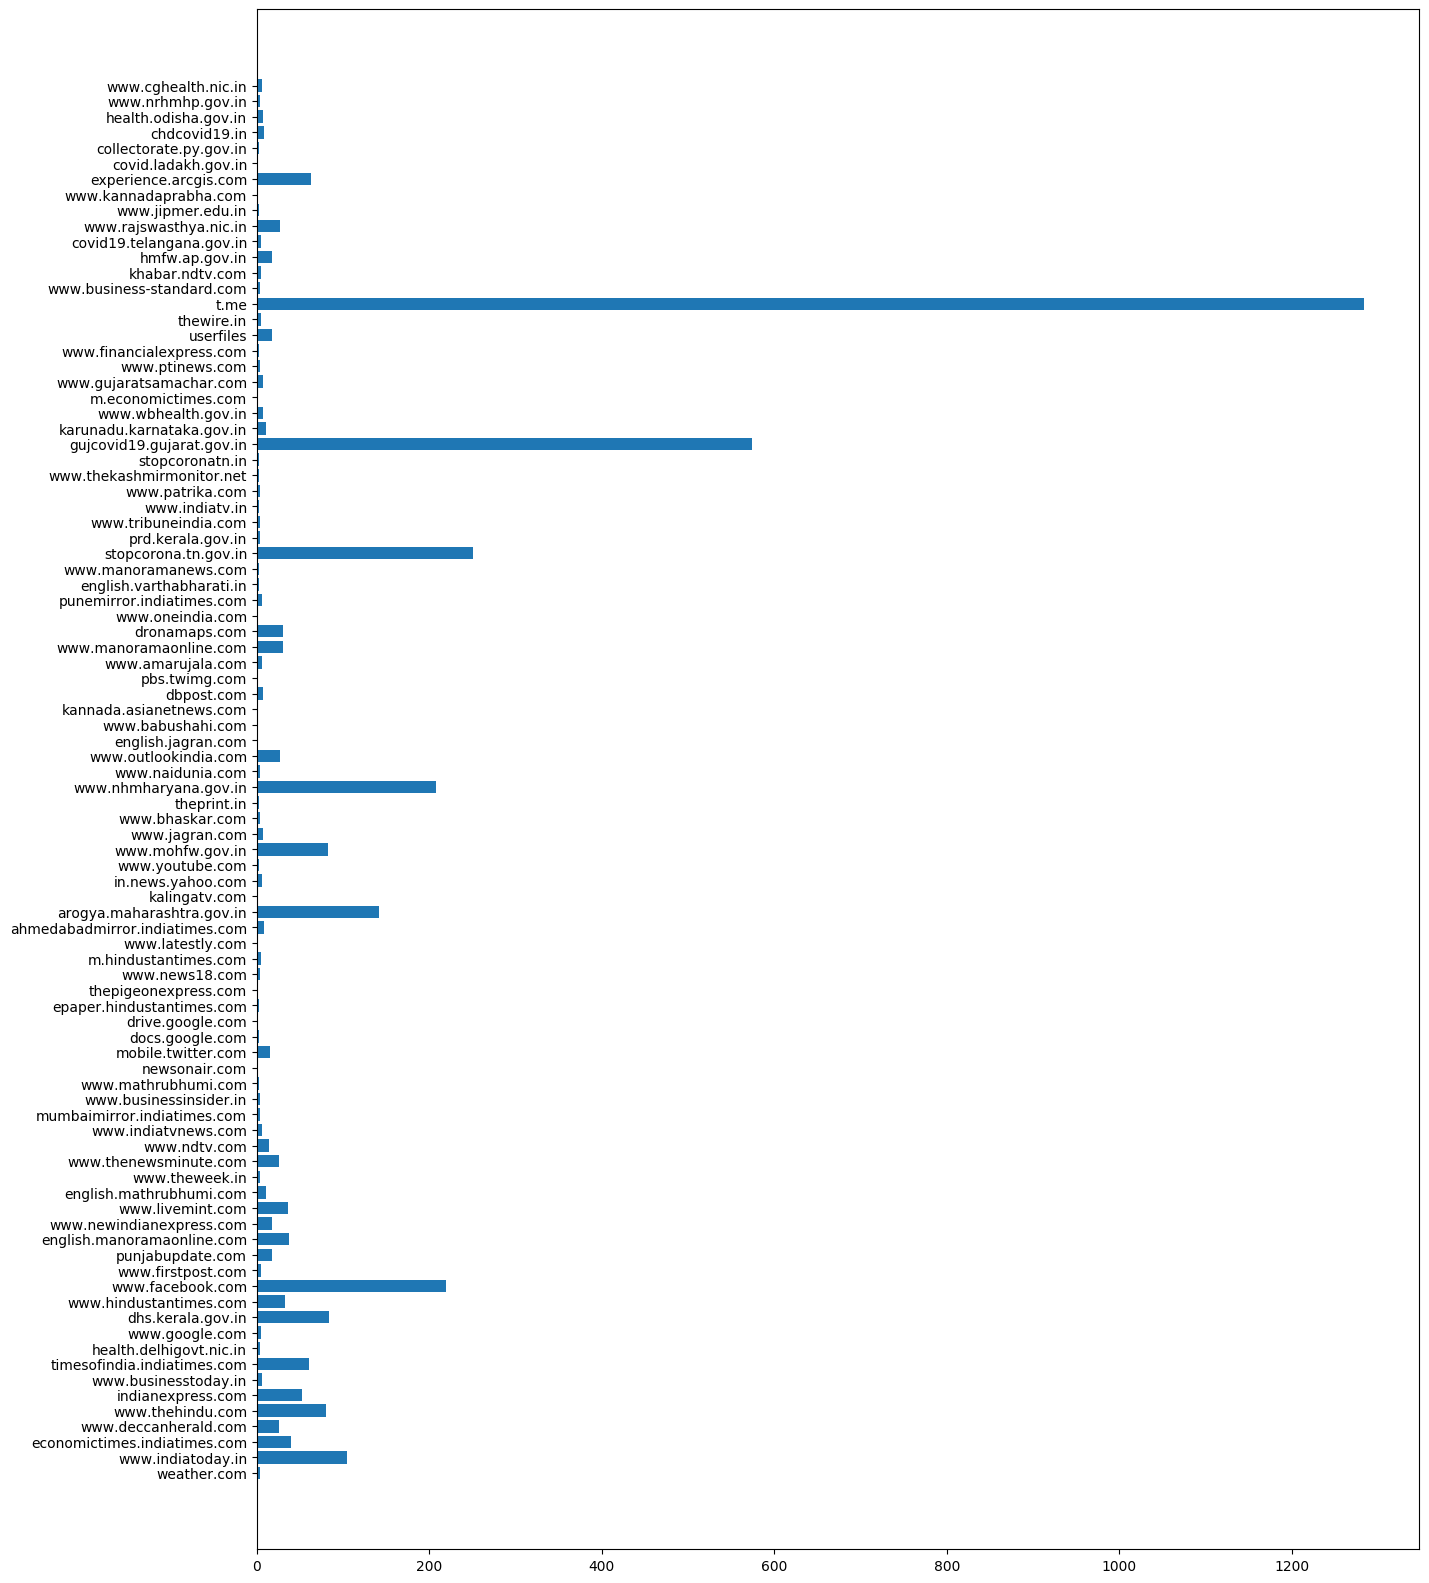

In [82]:
fig, ax = plt.subplots(figsize=(15,20))
source_list=[i for i in sources.keys() if i!="twitter.com"]
vals=[sources[i] for i in sources.keys() if i!="twitter.com"]
y_pos = np.arange(len(source_list))
ax.barh(y_pos,vals)
ax.set_yticks(y_pos)
ax.set_yticklabels(source_list)
plt.show()

# Part B

In [83]:
osm=["twitter.com","www.facebook.com","mobile.twitter.com"]

In [85]:
totalOsm=0
others=0
for source in sources.keys():
    if source in osm:
        totalOsm+=sources[source]
    else:
        others+=sources[source]

In [92]:
print(totalOsm,others)

16757 3603


<BarContainer object of 2 artists>

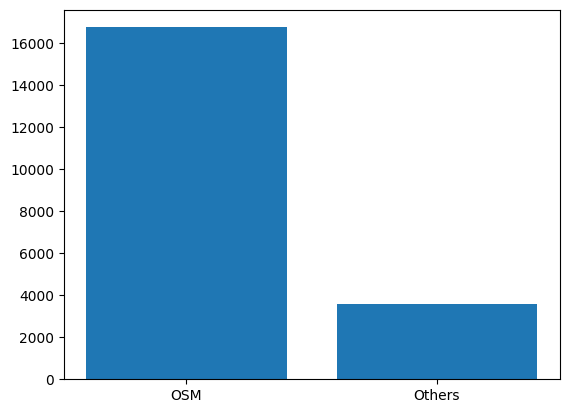

In [93]:
plt.bar(["OSM","Others"],[totalOsm,others])

# Part C

In [95]:
twitter=["twitter.com","mobile.twitter.com"]
tweet_links=[]
for ind,row in data.iterrows():
#     print(type(row['Source_1']),type(row['Source_2']),type(row['Source_3']))
    if isinstance(row['Source_1'],str):
        s1=getSite(row['Source_1'])
        if s1 in twitter:
            tweet_links.append(row['Source_1'])
    if isinstance(row['Source_2'],str):
        s2=getSite(row['Source_2'])
        if s2 in twitter:
            tweet_links.append(row['Source_2'])
    if isinstance(row['Source_3'],str):
        s3=getSite(row['Source_3'])
        if s3 in twitter:
            tweet_links.append(row['Source_3'])
    

['https:', '', 'twitter.com', 'vijayanpinarayi', 'status', '1222819465143832577']
['https:', '', 'weather.com', 'en-IN', 'india', 'news', 'news', '2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully']
['https:', '', 'www.indiatoday.in', 'india', 'story', 'kerala-reports-second-case-of-coronavirus-1642494-2020-02-02']
['https:', '', 'weather.com', 'en-IN', 'india', 'news', 'news', '2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully']
['https:', '', 'www.indiatoday.in', 'india', 'story', 'kerala-now-confirms-third-case-of-coronavirus-1642789-2020-02-03']
['https:', '', 'twitter.com', 'ANI', 'status', '1224221485805395968?s=20']
['https:', '', 'weather.com', 'en-IN', 'india', 'news', 'news', '2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully']
['https:', '', 'www.indiatoday.in', 'india', 'story', 'not-a-jail-delhi-s-1st-covid-19-patient-recalls-time-in-isolation-ward-has-this-one-tip-for-others-16

['https:', '', 'twitter.com', 'PTI_News', 'status', '1241931502671130624?s=20']
['https:', '', 'www.livemint.com', 'news', 'india', 'coronavirus-update-14-new-cases-reported-from-mumbai-1-from-pune-11584935139945.html']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1241931502671130624?s=20']
['https:', '', 'www.livemint.com', 'news', 'india', 'coronavirus-update-14-new-cases-reported-from-mumbai-1-from-pune-11584935139945.html']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1241931502671130624?s=20']
['https:', '', 'www.livemint.com', 'news', 'india', 'coronavirus-update-14-new-cases-reported-from-mumbai-1-from-pune-11584935139945.html']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1241931502671130624?s=20']
['https:', '', 'www.livemint.com', 'news', 'india', 'coronavirus-update-14-new-cases-reported-from-mumbai-1-from-pune-11584935139945.html']
['https:', '', 'twitter.com', 'ANI', 'status', '1241953201072394240?s=20']
['https:', '', 'timesofindia.indiatimes.com',

['https:', '', 'twitter.com', 'ANI', 'status', '1243178927452868617']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1243201529005268994']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1243198105148768263']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1243203975442075650']
['https:', '', 'twitter.com', 'kansalrohit69', 'status', '1243197465492250624']
['https:', '', 'twitter.com', 'IPRTelangana', 'status', '1243206861140049920', 'photo', '2']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1243215021582077953']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1243215021582077953']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1243215021582077953']
['http:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'timesofindia.indiatimes.com', 'city', 'surat', 'gujarat-records-third-covid-19-death-five-new-positive-cases', 'articleshow', '74838259.cms?utm_source=dlvr.it&utm_medium=twitter']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '12

['https:', '', 'www.thenewsminute.com', 'article', '10-month-old-baby-who-tested-positive-covid-19-tamil-nadu-recovers-122009']
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244239453981257728']
['https:', '', 'www.thenewsminute.com', 'article', '10-month-old-baby-who-tested-positive-covid-19-tamil-nadu-recovers-122009']
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244239453981257728']
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244239453981257728']
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244239453981257728']
['https:', '', 'twitter.com', 'Vijayabaskarofl', 'status', '1244239453981257728']
['https:', '', 'karunadu.karnataka.gov.in', 'hfw', 'kannada', 'nCovDocs', '29-03-2020(English).pdf']
['https:', '', 'karunadu.karnataka.gov.in', 'hfw', 'kannada', 'nCovDocs', '29-03-2020(English).pdf']
['https:', '', 'twitter.com', 'ANI', 'status', '1244257388812591106']
['https:', '', 'twitter.com', 'PTI_News', 'status', '124425686

['https:', '', 'twitter.com', 'ANI', 'status', '1244970503082774528']
['https:', '', 'www.facebook.com', 'CollectorKNR', 'posts', '2851879414908894']
['https:', '', 'twitter.com', 'ANI', 'status', '1244978684555124738']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'TOIAhmedabad', 'status', '1244990736526798849']
['https:', '', 'twitter.com', 'TOIAhmedabad', 'status', '1244991575337209859']
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1245005351436652552']
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1245005351436652552']
['https:', '', 'twitter.com', 'DHFWKA', 'status', '1245005351436652552']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'epressnote31.pdf']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'epressnote31.pdf']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'epressnote31.pdf']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'epressnote31.pdf']
['https:', '', 'arogya.maharashtra.gov.in', 'pdf', 'epressnote31.pdf']


['https:', '', 'twitter.com', 'PTI_News', 'status', '1245330284574150656']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159505228852647&id=100507158085788']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1245330284574150656']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159505228852647&id=100507158085788']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1245330284574150656']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159505228852647&id=100507158085788']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1245330284574150656']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159505228852647&id=100507158085788']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1245330284574150656']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=159505228852647&id=100507158085788']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1245330284574150656']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid

['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twitter.com', 'ANI', 'status', '1245693626472116226']
['https:', '', 'twit

['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twitter.com', 'ANI', 'status', '1246038578699751424']
['https:', '', 'twit

['http:', '', 'www.rajswasthya.nic.in', '']
['http:', '', 'www.rajswasthya.nic.in', '']
['http:', '', 'www.rajswasthya.nic.in', '']
['http:', '', 'www.rajswasthya.nic.in', '']
['http:', '', 'www.rajswasthya.nic.in', '']
['http:', '', 'www.rajswasthya.nic.in', '']
['http:', '', 'www.rajswasthya.nic.in', '']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:', '', 'twitter.com', 'HFWOdisha', 'status', '1246131083839561728']
['https:

['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twitter.com', 'ANI', 'status', '1246418320057708545']
['https:', '', 'twit

['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05 Apr Evening']
['State Bulletin: 05

['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1247145881775689728']
['http:', '', 'dhs.kerala.gov.in', 'wp-content', 'uploads', '2020', '04', 'Daily-Bulletin-HFWD-English-April-6-1.pdf']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=160965202039983&id=100507158085788']
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1247145881775689728']
['http:', '', 'dhs.kerala.gov.in', 'wp-content', 'uploads', '2020', '04', 'Daily-Bulletin-HFWD-English-April-6-1.pdf']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=160965202039983&id=100507158085788']
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1247145881775689728']
['http:', '', 'dhs.kerala.gov.in', 'wp-content', 'uploads', '2020', '04', 'Daily-Bulletin-HFWD-English-April-6-1.pdf']
['https:', '', 'www.facebook.com', 'permalink.php?story_fbid=160965202039983&id=100507158085788']
['https:', '', 'twitter.com', 'PIBTvpm', 'status', '1247145881775689728']
['http:', '', 'dhs.kerala.gov.in', 'wp-content', 'upl

['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.2020_Morning.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin_07.04.202

['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1247552125950812160', 'photo', '1']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1247560252892966913']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1247560252892966913']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1247560252892966913']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1247560252892966913']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1247

['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bulletin%2008042020%20evening.pdf']
['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'bull

['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1248126735008370688']
['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1248126735008370688']
['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1248126735008370688']
['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1248126735008370688']
['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1248126735008370688']
['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1248126735008370688']
['https:', '', 'twitter.com', 'ANI', 'status', '1248120599282700288']
['https:', '', 'twitter.com', 'PIBAh

['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHyderabad', 'status', '1248238757783851009']
['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHyderabad', 'status', '1248238757783851009']
['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHyderabad', 'status', '1248238757783851009']
['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHyderabad', 'status', '1248238757783851009']
['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHyderabad', 'status', '1248238757783851009']
['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHyderabad', 'status', '1248238757783851009']
['https:', '', 'twitter.com', 'ANI', 'status', '1248241330444292098']
['https:', '', 'twitter.com', 'TOIHy

['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:', '', 'twitter.com', 'ANI', 'status', '1248481100176838656']
['https:', '', 'gujcovid19.gujarat.gov.in', '']
['https:

['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1248629443230175232']
['https:', '', 'twitter.c

['https:', '', 'twitter.com', 'ANI', 'status', '1248812492005965824?s=20']
['https:', '', 'twitter.com', 'ANI', 'status', '1248812492005965824?s=20']
['https:', '', 'twitter.com', 'ANI', 'status', '1248812492005965824?s=20']
['https:', '', 'twitter.com', 'nhm_hp', 'status', '1248648731374714880?s=09']
['http:', '', 'www.nrhmhp.gov.in', '']
['https:', '', 'twitter.com', 'nhm_hp', 'status', '1248648731374714880?s=09']
['http:', '', 'www.nrhmhp.gov.in', '']
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1248874808353447937', 'photo', '1']
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1248874808353447937', 'photo', '1']
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1248874808353447937', 'photo', '1']
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1248874808353447937', 'photo', '1']
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1248874808353447937', 'photo', '1']
['https:', '', 'twitter.com', 'sriramulubjp', 'status', '1248874808353447937

['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twitter.com', 'ANI', 'status', '1248995777289916417']
['https:', '', 'twit

['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', '', 't.me', 'indiacovid', '2084']
['https:', '', 'twitter.com', 'ANI', 'status', '1249269681841754112', 'photo', '1']
['https:', ''

['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249354442656251904']
['https:', '', 'twitter.c

['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN', 'status', '1249688607515959298']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249684563674034177']
['https:', '', 'twitter.com', 'NHM_TN

['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twitter.com', 'ANI', 'status', '1249721645905793025']
['https:', '', 'twit

['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1249744159491031047']
['https:', '', 'twitter.c

['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951763781890049']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1249950597534470145']
['https:', '', 'twitter.com', 'ANI', 'status', '1249951

['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155?s=19']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1250069127743537155

['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1504152020110534401.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief15041520201105

['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:', '', 't.me', 'indiacovid', '2406']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1250436895277899776']
['https:

['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief1604162020113223580.pdf']
['https:', '', 'gujcovid19.gujarat.gov.in', 'uploads', 'pressbrief16041620201132

['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twitter.com', 'ANI', 'status', '1250753385894227968']
['https:', '', 'twit

['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1250800029029199872']
['https:', '', 'twitter.c

['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['mohfw.gov.in']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1250997184205475841']
['https:', '', 'twitter.com', 'PIBJaipur', 'status',

['http:', '', 'www.nhmharyana.gov.in', 'WriteReadData', 'userfiles', 'file', 'CoronaVirus', 'Bulletin17_04_2020_Evening.pdf']
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1251163434059575296']
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1251163434059575296']
['https:', '', 'twitter.com', 'ANINewsUP', 'status', '1251163434059575296']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '1251154157924282371']
['https:', '', 'twitter.com', 'diprjk', 'status', '12511541579

['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twitter.com', 'ANI', 'status', '1251178948672868352']
['https:', '', 'twit

['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twitter.com', 'ANI', 'status', '1251381444263374848']
['https:', '', 'twit

['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.com', 'PTI_News', 'status', '1251515227637604358']
['https:', '', 'twitter.c

['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi', 'status', '1251559869494198282?s=19']
['https:', '', 'twitter.com', 'CMODelhi'

['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'status', '1251751634364960769']
['https:', '', 'twitter.com', 'PIBAhmedabad', 'statu

['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1251721197273911297']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1251721197273911297']
['https:', '', 'twitter.com', 'PIBJaipur', 'status', '1251721197273911297']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251791937897558017']
['https:', '', 'twitter.com', 'ArogyaAndhra', 'status', '1251

['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twit

['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twitter.com', 'ANI', 'status', '1251890669884444680']
['https:', '', 'twit

['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:', '', 't.me', 'indiacovid', '2679']
['https:',

In [96]:
len(tweet_links)

16538

In [98]:
tweet_links

['https://twitter.com/vijayanpinarayi/status/1222819465143832577',
 'https://twitter.com/ANI/status/1224221485805395968?s=20',
 'https://twitter.com/PTI_News/status/1240878975846506496',
 'https://twitter.com/xpressandhra/status/1242088017197559808?s=20',
 'https://twitter.com/ArogyaAndhra/status/1245225191178768386?s=20',
 'https://twitter.com/rajeshtope11',
 'https://twitter.com/ANI/status/1238482416936701953',
 'https://twitter.com/ANI/status/1238882567987662855',
 'https://twitter.com/ANI/status/1238882567987662855',
 'https://twitter.com/ANI/status/1238882567987662855',
 'https://twitter.com/ANI/status/1238882567987662855',
 'https://twitter.com/ANI/status/1238882567987662855',
 'https://twitter.com/ANI/status/1239183764946731008?s=20',
 'https://twitter.com/ANI/status/1239183764946731008?s=20',
 'https://twitter.com/timesofindia/status/1239099655780065282',
 'https://twitter.com/kansalrohit69',
 'https://twitter.com/ANI/status/1239597418640900096',
 'https://twitter.com/ANI/statu

In [100]:
def getTweetID(link):
    l=link.split("/")
    if len(l)<6:
        return -1
    string=l[5]
    return string.split('?')[0]

In [101]:
tweetID=[]
for i in tweet_links:
    ID=getTweetID(i)
    if ID!=-1:
        tweetID.append(ID)

In [103]:
for i in tweetID:
    print(i)

1222819465143832577
1224221485805395968
1240878975846506496
1242088017197559808
1245225191178768386
1238482416936701953
1238882567987662855
1238882567987662855
1238882567987662855
1238882567987662855
1238882567987662855
1239183764946731008
1239183764946731008
1239099655780065282
1239597418640900096
1239454591894163458
1239454591894163458
1239454591894163458
1239454591894163458
1239464597486071808
1239546773883850753
1239796624928444416
1239796624928444416
1239796624928444416
1239745794753695744
1239769810608590848
1239891569785765893
1239886488629698567
1239866086905921536
1239894891678724097
1239777755505373184
1239777755505373184
1239951825765158912
1239953388248260608
1239969373013438464
1239969373013438464
1240112477951496198
1240189934410948609
1240189934410948609
1240188649334964224
1240250048639668224
1240259888917278725
1240262937576484864
1240259610486829056
1240287855051599872
1240284806908235778
1240304049422888960
1240304036143718407
1240318300942266368
1240312429638070274


1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245353004317933568
1245356056353505283
1245356056353505283
1245356056353505283
1245356056353505283
1245356056353505283
1249600756392456194
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245346024417366016
1245372704636538881
1245377181057835008
1245372704636538881
1245377181057835008
1245372704636538881
1245377181057835008
1245372704636538881
1245377181057835008
1245372704636538881


1246408356790562816
1246402439751712768
1246402439751712768
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246407041972760577
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968
1246408741357944833
1246409749911891968


1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431
1247164710417383431


1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248096119348850689
1248084830476173313
1248084830476173313
1248097618594533378
1248097618594533378
1248097618594533378
1248097618594533378
1248097618594533378
1248075292398292992
1248122225116364802
1248122225116364802
1248122225116364802
1248122225116364802
1248122225116364802
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688
1248120599282700288
1248126735008370688


1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248537257281064960
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248571121252724736
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232
1248560775678943232


1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153
1248962069497393153


1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249322012058644480
1249334308076007426
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481
1249341668526100481


1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025
1249721645905793025


1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296
1250010678670135296


1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250415908754829314
1250429960319152128
1250436322763796492
1250440617420709894
1250436322763796492
1250440617420709894
1250436322763796492
1250440617420709894
1250436322763796492
1250440617420709894
1250436322763796492
1250440617420709894
1250436322763796492
1250440617420709894
1250436322763796492
1250440617420709894
1250436322763796492


1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913
1250811102721486849
1250813036895469568
1250813598651174913


1251504616476258305
1251504616476258305
1251504616476258305
1251504616476258305
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848
1251381444263374848


1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282
1251559869494198282


1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680
1251890669884444680


In [109]:
import tweepy
apiKey = 'GrA3nnbfd72pCqfBGUR6RKnul'
apiSecretKey = 'mjZdyFx5sN38u2joIKNKzjgIuGOCpLOoXoKo1GoV9Vc44YH9HE'
auth = tweepy.OAuthHandler(apiKey,apiSecretKey)
accessToken = '1214429579030319105-GQTJuPKzWQfow9mwxvXCFxpO0cjsgi'
accessSecretToken = 'fksdPA39BXWBgpi4CpVKT1k537kFjzfCIt8vT8H3ReFci'

auth.set_access_token(accessToken,accessSecretToken)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=10, retry_delay=5, retry_errors=set([503]))
if (api):
    print("Yaay")
else:
    print("Nahh")

Yaay


In [ ]:
tweetID_orig=tweetID

In [150]:
tweetID=list(set(tweetID))

In [151]:
tweets=[]
for i in range(len(tweetID)):
    print(i)
    tw=api.get_status(tweetID[i],tweet_mode='extended')
    tweets.append(tw)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


TweepError: Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=1242855271216619522&tweet_mode=extended (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x12284b1d0>, 'Connection to api.twitter.com timed out. (connect timeout=60)'))

In [172]:
for i in range(904,len(tweetID)):
    print(i)
    tw=api.get_status(tweetID[i],tweet_mode='extended')
    tweets.append(tw)

In [174]:
len(tweets)

893

In [187]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x120f7f550>, _json={'created_at': 'Mon Apr 13 03:55:49 +0000 2020', 'id': 1249546807589212161, 'id_str': '1249546807589212161', 'full_text': 'Alert ~ Another person from Dhubri, connected with #TablighiJamaat meet at #NizamuddinMarkaz, has been found #COVID19 positive. The total number of #Covid patients in #Assam now stands at 30.\n\nUpdate at 9.15 am / April 13 \n\n#AssamCovidCount', 'truncated': False, 'display_text_range': [0, 240], 'entities': {'hashtags': [{'text': 'TablighiJamaat', 'indices': [51, 66]}, {'text': 'NizamuddinMarkaz', 'indices': [75, 92]}, {'text': 'COVID19', 'indices': [109, 117]}, {'text': 'Covid', 'indices': [148, 154]}, {'text': 'Assam', 'indices': [167, 173]}, {'text': 'AssamCovidCount', 'indices': [224, 240]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'i

In [196]:
latest=[]
for i in range(len(tweets)):
    latest.append((tweets[i].created_at,i))

In [198]:
latest.sort(reverse=True)

In [200]:
latest

[(datetime.datetime(2020, 4, 19, 18, 19, 19), 29),
 (datetime.datetime(2020, 4, 19, 17, 46, 32), 449),
 (datetime.datetime(2020, 4, 19, 16, 49, 33), 132),
 (datetime.datetime(2020, 4, 19, 15, 59, 9), 778),
 (datetime.datetime(2020, 4, 19, 15, 18, 1), 90),
 (datetime.datetime(2020, 4, 19, 15, 9, 29), 443),
 (datetime.datetime(2020, 4, 19, 14, 39, 8), 648),
 (datetime.datetime(2020, 4, 19, 14, 28, 56), 179),
 (datetime.datetime(2020, 4, 19, 13, 33, 58), 678),
 (datetime.datetime(2020, 4, 19, 13, 18, 44), 314),
 (datetime.datetime(2020, 4, 19, 12, 55, 9), 529),
 (datetime.datetime(2020, 4, 19, 12, 49, 32), 491),
 (datetime.datetime(2020, 4, 19, 12, 39, 53), 712),
 (datetime.datetime(2020, 4, 19, 11, 42, 15), 197),
 (datetime.datetime(2020, 4, 19, 10, 23, 34), 53),
 (datetime.datetime(2020, 4, 19, 9, 32, 39), 460),
 (datetime.datetime(2020, 4, 19, 9, 16, 41), 801),
 (datetime.datetime(2020, 4, 19, 8, 37, 9), 746),
 (datetime.datetime(2020, 4, 19, 8, 36, 56), 638),
 (datetime.datetime(2020,

In [206]:
recent=[]
for i in range(10):
    recent.append(tweets[latest[i][1]].id)

In [207]:
recent

[1251938442067361792,
 1251930194690048002,
 1251915853442007040,
 1251903167668850688,
 1251892819989598208,
 1251890669884444680,
 1251883032836927488,
 1251880465012854785,
 1251866633360093184,
 1251862797828460545]

# Part D

In [208]:
import re

In [210]:
tweets_text=[]
for tweet in tweets:
    tweets_text.append(tweet.full_text)

In [211]:
tweets_text

['Alert ~ Another person from Dhubri, connected with #TablighiJamaat meet at #NizamuddinMarkaz, has been found #COVID19 positive. The total number of #Covid patients in #Assam now stands at 30.\n\nUpdate at 9.15 am / April 13 \n\n#AssamCovidCount',
 '42 new COVID-19 cases in Indore; MP tally surges to 980: Health officials',
 'दिल्ली में 30 केस -23 विदेश से लौटे लोग, 7 उनसे संक्रमित उनके परिवार वाले। फ़िलहाल दिल्ली की स्थिति नियंत्रण में\n\nदूसरे देशों से पता चलता है कि अगर अभी सख़्ती नहीं की तो स्थिति जल्द बेक़ाबू हो सकती है। इसलिए लॉकडाउन का पालन करें ताकि स्थिति बेक़ाबू ना हो',
 "# COVID19 \n#JammuAndKashmir \nAs we end the day,  two more positive cases confirmed -both from Rajouri District. One a family member of yesterday's confirmed case, the other has a contact history with a confirmed (now deceased) case. #Stillnotlate #Breakthechain\n@diprjk",
 'Latest Update on #CoronaVirus in Rajasthan:\nTotal sample till date 657\nPositive -17 (3 recovered, 14 positive)\nNegative -603\nUnde

In [213]:
puncRemoved=[]
#removing punctutations
for tweet in tweets:
    puncRemoved.append(re.sub('[,\.!?]', '', tweet.full_text))

In [214]:
import nltk
from nltk.corpus import stopwords

In [215]:
lowerTextTweets=[]
for tweet in puncRemoved:
    tweet=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',tweet)
    words=tweet.split()
    withoutStop=[i for i in words if i.lower() not in stopwords.words('english')]
    tweet=' '.join(withoutStop)
    lowerTextTweets.append(tweet.lower())

lowerTextTweets

['alert ~ another person dhubri connected #tablighijamaat meet #nizamuddinmarkaz found #covid19 positive total number #covid patients #assam stands 30 update 915 / april 13 #assamcovidcount',
 '42 new covid-19 cases indore; mp tally surges 980: health officials',
 'दिल्ली में 30 केस -23 विदेश से लौटे लोग 7 उनसे संक्रमित उनके परिवार वाले। फ़िलहाल दिल्ली की स्थिति नियंत्रण में दूसरे देशों से पता चलता है कि अगर अभी सख़्ती नहीं की तो स्थिति जल्द बेक़ाबू हो सकती है। इसलिए लॉकडाउन का पालन करें ताकि स्थिति बेक़ाबू ना हो',
 "# covid19 #jammuandkashmir end day two positive cases confirmed -both rajouri district one family member yesterday's confirmed case contact history confirmed (now deceased) case #stillnotlate #breakthechain @diprjk",
 'latest update #coronavirus rajasthan: total sample till date 657 positive -17 (3 recovered 14 positive) negative -603 process - 37 14 positive: jaipur -5 jhunjhunu- 3 bhilwara - 6 #coronavirusupdate',
 '#biharfightscorona first update day1 covid-19 positive 

In [216]:
len(lowerTextTweets)

893

In [217]:
from wordcloud import WordCloud

In [220]:
allTweets=' '.join(lowerTextTweets)
allTweets

'alert ~ another person dhubri connected #tablighijamaat meet #nizamuddinmarkaz found #covid19 positive total number #covid patients #assam stands 30 update 915 / april 13 #assamcovidcount 42 new covid-19 cases indore; mp tally surges 980: health officials दिल्ली में 30 केस -23 विदेश से लौटे लोग 7 उनसे संक्रमित उनके परिवार वाले। फ़िलहाल दिल्ली की स्थिति नियंत्रण में दूसरे देशों से पता चलता है कि अगर अभी सख़्ती नहीं की तो स्थिति जल्द बेक़ाबू हो सकती है। इसलिए लॉकडाउन का पालन करें ताकि स्थिति बेक़ाबू ना हो # covid19 #jammuandkashmir end day two positive cases confirmed -both rajouri district one family member yesterday\'s confirmed case contact history confirmed (now deceased) case #stillnotlate #breakthechain @diprjk latest update #coronavirus rajasthan: total sample till date 657 positive -17 (3 recovered 14 positive) negative -603 process - 37 14 positive: jaipur -5 jhunjhunu- 3 bhilwara - 6 #coronavirusupdate #biharfightscorona first update day1 covid-19 positive cases bihar taking t

In [253]:
from PIL import Image
from skimage import io
our_mask=np.asarray(Image.open("mask.png"))
# print(type(our_mask[0][0]))
new_mask=[[0 for i in range(len(our_mask)) ]for j in range(len(our_mask[i]))]
for i in range(len(our_mask)):
    for j in range(len(our_mask[i])):
        print(our_mask[i][j])
        if our_mask[i][j]==1:
            new_mask[i][j]=0
        else:
            new_mask[i][j]=1
new_mask=np.asarray(new_mask,dtype='uint8')

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
25
113
203
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
200
106
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
49
200
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
65
231
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
229
56
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
69
179
253
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
55
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
227
255
255
255
126
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
246
70
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
55
141
225
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
140
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
110
255
255
255
255
255
255
255
255
255
255
255
255
255
122
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
216
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
216
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
230
35
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
44
246
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
2

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
143
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
25

KeyboardInterrupt: 

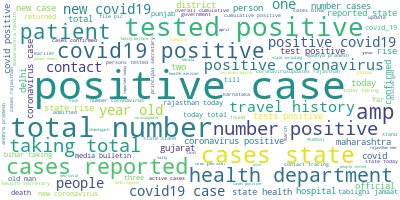

In [254]:
wordcloud = WordCloud(background_color="white", max_words=2000)
wordcloud.generate(allTweets)
wordcloud.to_image()

# Part H

In [228]:
users={}
maxTweets=0
userID=0
for tweet in tweets:
    user_id=tweet.user.id
    if user_id in users:
        users[user_id]+=1
    else:
        users[user_id]=1
    if users[user_id]>maxTweets:
        maxTweets=users[user_id]
        userID=user_id
            

In [232]:
print(userID,users[userID])

355989081 319


In [231]:
users

{131188226: 12,
 245687754: 97,
 405427035: 1,
 731117568556142592: 26,
 3240740509: 36,
 101021297: 29,
 355989081: 319,
 3304641168: 9,
 706709499856334848: 29,
 2348042388: 2,
 876997365999190016: 45,
 346406417: 1,
 755271973278711808: 1,
 1019887446417215489: 16,
 515310146: 4,
 35691170: 38,
 830669077022531584: 9,
 412981124: 1,
 740689850: 15,
 825566197714403328: 14,
 2424317357: 1,
 31059478: 6,
 743517005920141314: 8,
 3258071491: 3,
 826734320018661378: 14,
 1242298980660178951: 13,
 470241578: 1,
 1193808848047337473: 2,
 902084078882611200: 13,
 2926777939: 15,
 183145504: 9,
 1183717772938727425: 6,
 1149574156683362305: 3,
 31060961: 7,
 240649814: 3,
 36327407: 1,
 992966051657756672: 8,
 1113388720533647362: 1,
 2707179805: 2,
 3602209398: 1,
 878261831629815810: 4,
 29738362: 1,
 2590878146: 1,
 2994621330: 13,
 47045926: 10,
 1056850669: 4,
 895622385113612289: 1,
 725003596811620353: 2,
 20751449: 5,
 39743812: 1,
 2707085628: 1,
 134758540: 2,
 874241422265769984:

In [234]:
user=api.get_user(userID)
print(user.id,user.screen_name)

355989081 ANI


In [255]:
user.verified

True

# Part F

In [257]:
len(tweets)

893

In [258]:
tweets_text=[]
for tweet in tweets:
    tweets_text.append(tweet.full_text)

In [259]:
tweets_text

['Alert ~ Another person from Dhubri, connected with #TablighiJamaat meet at #NizamuddinMarkaz, has been found #COVID19 positive. The total number of #Covid patients in #Assam now stands at 30.\n\nUpdate at 9.15 am / April 13 \n\n#AssamCovidCount',
 '42 new COVID-19 cases in Indore; MP tally surges to 980: Health officials',
 'दिल्ली में 30 केस -23 विदेश से लौटे लोग, 7 उनसे संक्रमित उनके परिवार वाले। फ़िलहाल दिल्ली की स्थिति नियंत्रण में\n\nदूसरे देशों से पता चलता है कि अगर अभी सख़्ती नहीं की तो स्थिति जल्द बेक़ाबू हो सकती है। इसलिए लॉकडाउन का पालन करें ताकि स्थिति बेक़ाबू ना हो',
 "# COVID19 \n#JammuAndKashmir \nAs we end the day,  two more positive cases confirmed -both from Rajouri District. One a family member of yesterday's confirmed case, the other has a contact history with a confirmed (now deceased) case. #Stillnotlate #Breakthechain\n@diprjk",
 'Latest Update on #CoronaVirus in Rajasthan:\nTotal sample till date 657\nPositive -17 (3 recovered, 14 positive)\nNegative -603\nUnde

### Mobile numbers

In [260]:
mobile_numbers={}
for tweet in tweets:
    number=re.findall('(?:\s+|)((0|(?:(\+|)91))(?:\s|-)*(?:(?:\d(?:\s|-)*\d{9})|(?:\d{2}(?:\s|-)*\d{8})|(?:\d{3}(?:\s|-)*\d{7}))|\d{10})(?:\s+|)',tweet.full_text)
    real_num=[]
    for num in number:
        for val in num:
            if len(val)>=8:
                real_num.append(val)
    if len(number)>0:
        mobile_numbers[tweet.id]=real_num

In [261]:
mobile_numbers

{1245265375626842113: ['080-29711171']}

In [262]:
tw=api.get_status(1245265375626842113,tweet_mode='extended')
tw.full_text

'Till date 105 COVID-19 positive cases have been confirmed this includes 3 deaths &amp; 9 discharges.  \n\nAny person who has attended Tablighi Jamaat Congregration at Nizamuddin Markaz Masjid in New Delhi, kindly contact 080-29711171 Arogya Sayavaani.'

### Names and Places

In [263]:
import nltk
from nameparser.parser import HumanName
from nltk.corpus import wordnet

In [264]:
def get_human_names(text):
    tokens = nltk.tokenize.word_tokenize(text)
    pos = nltk.pos_tag(tokens)
    sentt = nltk.ne_chunk(pos, binary = False)

    person = []
    name = ""
    for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'):
        for leaf in subtree.leaves():
            person.append(leaf[0])
        if len(person) > 1: #avoid grabbing lone surnames
            for part in person:
                name += part + ' '
            if name[:-1] not in person_list:
                person_list.append(name[:-1])
            name = ''
        person = []

In [265]:
names={}
for tweet in tweets:
    person_list = []
    person_names=person_list
    text=""
    try:
        text=tweet.retweeted_status.full_text
    except:
        text=tweet.full_text
    get_human_names(tweet.full_text)
    for person in person_list:
        person_split = person.split(" ")
        for name in person_split:
            if wordnet.synsets(name):
                if(name in person):
                    person_names.remove(person)
                    break
    if person_names:
        names[tweet.id]=person_names


In [266]:
len(names)

171

In [279]:
names

{1241034734811017217: ['Jaipur -5'],
 1249366216994697226: ['Nitin Madan Kulkarni'],
 1250045329283506176: ['Kannur -4 Kozhikode'],
 1246412525890973697: ['Amit Mohan'],
 1250105830873034752: ['Athgaon Kabristan'],
 1247010484211060739: ['Tablighi Jamaat'],
 1250771046388518914: ['Health Department'],
 1245344009637281792: ['Sanjay Kumar'],
 1244168189354758145: ['Andhra Pradesh'],
 1246835208013238272: ['Amritsar Hospital'],
 1247505727272267784: ['Rohit Kansal'],
 1245727826017423362: ['Markaz Nizamuddin'],
 1245331856553320448: ['Rohit Kansal'],
 1250330400666161161: ['Sanjay Kumar'],
 1246784571036667904: ['Tablighi Jamaat'],
 1244696919902806016: ['Raipur AIIMS'],
 1242088017197559808: ['Nellore GGH'],
 1242063740637339649: ['Pankaj Pandey'],
 1251892819989598208: ['Nitin Madan Kulkarni'],
 1241767703146201090: ['Rohit Singh'],
 1245692712986214400: ['Pinarayi Vijayan'],
 1246763972671483906: ['Tablighi Jamaat'],
 1245581420484907008: ['Arja Srikanth'],
 1251166895497261058: ['Aza

In [273]:
humansID=[1249366216994697226,1246412525890973697,1245344009637281792,1247505727272267784,1245331856553320448,1250330400666161161,1242063740637339649,1251892819989598208,1241767703146201090,1245692712986214400,1245581420484907008,1251166895497261058,]

In [278]:
names.pop(1242856239492730881)

['𝐏𝐚𝐭𝐢𝐞𝐧𝐭 𝐍𝐨']

In [287]:
tw=api.get_status(1242063740637339649,tweet_mode='extended')

In [288]:
tw.full_text

"One more person, who is under observation at Dehradun's Doon Hospital, tests positive for #Coronavirus. 3 trainee officers of Indian Forest Services were earlier tested positive: Pankaj Pandey, Secy Medical, Health &amp; Medical Education Dept, Uttarakhand"